## S04 T02: Visualització gràfica de Múltiples variables

### Exercici 1

Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips". 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
tips=pd.read_csv('/Users/Diana/Downloads/tips.csv')

In [3]:
tips.shape

(244, 7)

In [4]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [5]:
tips.describe().round(1)

,total_bill,tip,size
count,244.0,244.0,244.0
mean,19.8,3.0,2.6
std,8.9,1.4,1.0
min,3.1,1.0,1.0
25%,13.3,2.0,2.0
50%,17.8,2.9,2.0
75%,24.1,3.6,3.0
max,50.8,10.0,6.0


In [6]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [7]:
#calculate the % of tips vs total bill for each day

tips['percentage_tips']=round((tips['tip']/tips['total_bill'])*100,2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percentage_tips
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


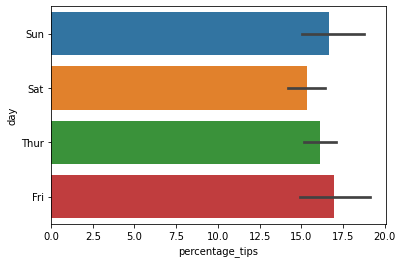

In [8]:
sns.barplot(x='percentage_tips', y='day', data=tips, orient='h')
plt.show()

Friday and Sunday are the days with the highest % of tips

But, when people leave the highest tip during lunch or during dinner?

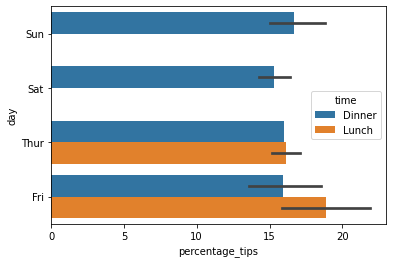

In [9]:
sns.barplot(x='percentage_tips', y='day', data=tips, orient='h', hue='time')  #use hue to display categories
plt.show()

In [10]:
round(tips.describe(include='all'), 1)

,total_bill,tip,sex,smoker,day,time,size,percentage_tips
count,244.0,244.0,244,244,244,244,244.0,244.0
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.8,3.0,NaN,NaN,NaN,NaN,2.6,16.1
std,8.9,1.4,NaN,NaN,NaN,NaN,1.0,6.1
min,3.1,1.0,NaN,NaN,NaN,NaN,1.0,3.6
25%,13.3,2.0,NaN,NaN,NaN,NaN,2.0,12.9
50%,17.8,2.9,NaN,NaN,NaN,NaN,2.0,15.5
75%,24.1,3.6,NaN,NaN,NaN,NaN,3.0,19.1


In [11]:
round((tips['tip']).describe(), 3)

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64

In [12]:
(tips['tip']).median()

2.9

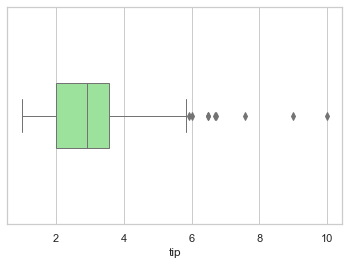

In [13]:
sns.set(style='whitegrid')
ax=sns.boxplot(x=tips['tip'], color='lightgreen', fliersize=5, orient='v', linewidth=1, width=0.3)

This boxplot describes all the variables that we got from describe function and also draws the outliers.

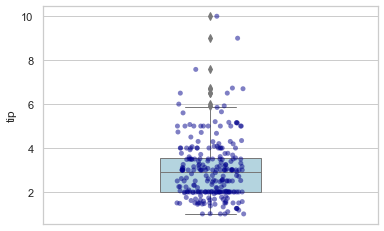

In [14]:
#we can also mix two plots: scattered and boxplot so we can see the amount of observations for each measure

ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5)

I will now use the boxplot in different situations:

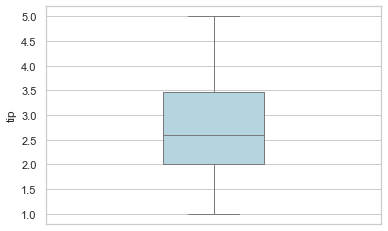

In [15]:
#for 1 numerical variable: tips with value <=10

sns.boxplot(y="tip", data=tips[tips.tip <= 5],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);


Here, we can see that for tips less or equal than 5 dollars, the average is 2.6 and 75 per cent of tips are less than 3.5 dollars.

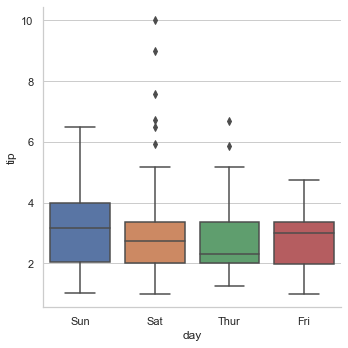

In [16]:
#let's play now with two variables: 1 numerical and 1 categorical. I will use 'day' as a categorical data

ax = sns.catplot(x='day', y='tip', kind='box',
                 data=tips)

On Friday and on Sunday tips are higher than any other day of the week (with more than 3.5 dollar tip on average. Thursday is the weakest day with difference on the amount of tips with less than 2.5 dollars.

<Figure size 792x504 with 0 Axes>

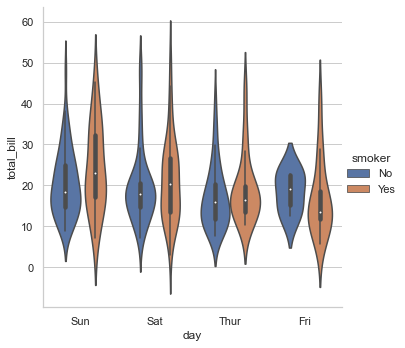

In [62]:
#I will use a violin plot to visualize data of the amount spent between smokers and non smokers

plt.figure(figsize =(11, 7))
g=sns.catplot(x='day', y='total_bill', hue = 'smoker', data=tips, orient='v', kind='violin')
plt.show()

On Sunday and Saturday, the median spend of smokers is higher than that of non smokers.
On Thursday the median is almost the same value, and on Friday smokers median is lower than non smokers.
Non smoker values are more concentrated around the median than smoker values.

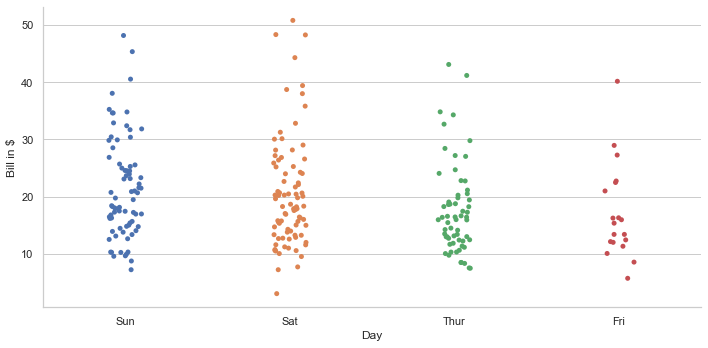

In [17]:
#Here is another chart: spend by day

sns.set_style("whitegrid")
sns.catplot(x="day", y="total_bill", data=tips, height=5, aspect=2)
plt.xlabel('Day')
plt.ylabel('Bill in $')
plt.show()

Friday is the day with less customers. On Saturday and Sunday the customers spend more. That's because we're talking about dinner time only in which the menu probably is more expensive and there could be also more people by table.

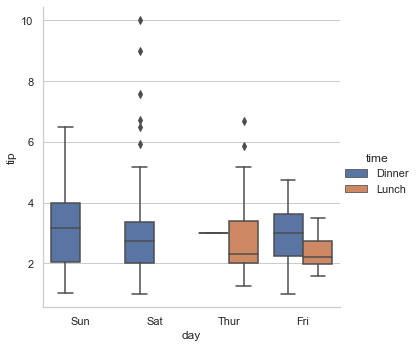

In [18]:
#display two variables: two caregorical ('day' and 'time') and one numerical ('tip')

ax = sns.catplot(x='day', y='tip', kind='box',
                 data=tips, hue='time')

Dinner time leaves more tips than lunch time.

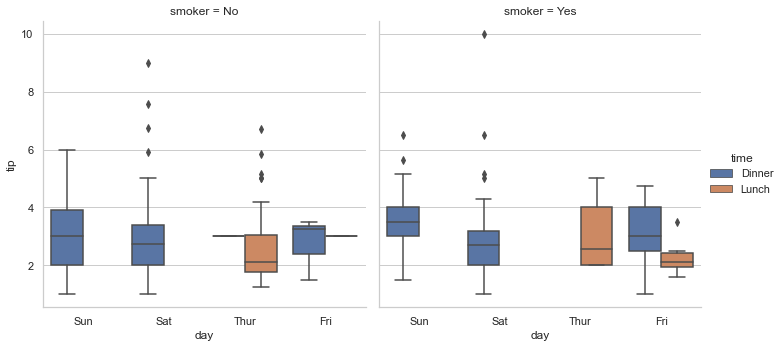

In [19]:
#four variables: three categorical ('day', 'time', and 'smoker') and one numerical ('tips'). Use the "col" attribute


ax = sns.catplot(x='day', y='tip', kind='box', col='smoker',
                 data=tips, hue='time')

Smokers tend to leave higher tips than non smokers.

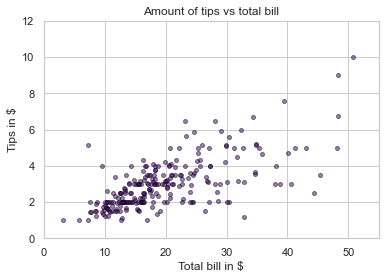

In [20]:
#Also, I would like to know the correlation between two variables

#Create data

x=tips.total_bill
y=tips.tip

area = np.pi*5

plt.axis([0, 55, 0, 12])

# Plot
plt.scatter(x, y, s=area, c='indigo', alpha=0.5, edgecolors='black')

plt.title('Amount of tips vs total bill')
plt.ylabel('Tips in $')
plt.xlabel('Total bill in $')
plt.show()

In any Scatterplot, each point represents a single case/observation. Since there are 244 cases in *tips*, there are 244 points. We can see a positive correlation between the total bill and the amount of tips given (the more you spend, the more you tip)

### Exercici 2 i Exercici 3

Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat. Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.

In [21]:
data_link='/Users/Diana/Downloads/Data-Science-main/Pre-processing-data/movies.dat'
movies=pd.read_table(data_link, sep='::', engine='python',encoding='latin-1')

In [22]:
#show number of rows and columns in the dataset

movies.shape

(3882, 3)

This dataset contains 3882 rows and 3 columns.

In [23]:
#take a look at the data

movies.head()

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [24]:
#As columns are not named we will name them:

movies.columns=['ID','Movie Title','Genre']

In [25]:
#Also, I would like to slice the year of the movie in another column

movies[['Movie Title', 'Year']] = movies['Movie Title'].str.rsplit(pat='(', n=1, expand=True)
movies.head()

,ID,Movie Title,Genre,Year
0,2,Jumanji,Adventure|Children's|Fantasy,1995)
1,3,Grumpier Old Men,Comedy|Romance,1995)
2,4,Waiting to Exhale,Comedy|Drama,1995)
3,5,Father of the Bride Part II,Comedy,1995)
4,6,Heat,Action|Crime|Thriller,1995)


In [26]:
movies.columns

Index(['ID', 'Movie Title', 'Genre', 'Year'], dtype='object')

In [27]:
#remove the ')' and convert it to int

movies.Year = movies.Year.str[:-1].astype(int)
movies.head()

,ID,Movie Title,Genre,Year
0,2,Jumanji,Adventure|Children's|Fantasy,1995
1,3,Grumpier Old Men,Comedy|Romance,1995
2,4,Waiting to Exhale,Comedy|Drama,1995
3,5,Father of the Bride Part II,Comedy,1995
4,6,Heat,Action|Crime|Thriller,1995


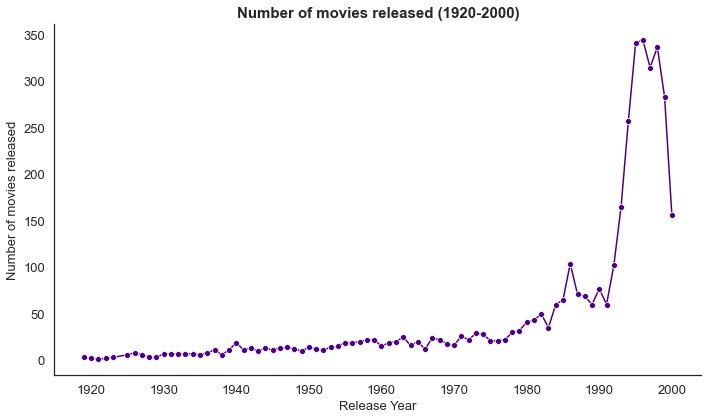

In [28]:
#I would like to visualize the number of movies release by year

plt.figure(figsize=(10,6))

plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('axes', labelsize=13)    
sns.set_style('white')
sns.lineplot(data=movies.Year.value_counts(),marker='o', color='indigo')
sns.despine()
plt.xlabel('Release Year')
plt.ylabel('Number of movies released')
plt.title("Number of movies released (1920-2000)", size=15, fontweight='bold')
plt.tight_layout();

As we can see in the 1990's the number of releases began to rocket. The higher peak is almost 350 movies in 1996.

In [29]:
#display the statistical data of variale "Year" for the last 10 years

annual_movies=movies.Year.value_counts()
annual_movies=annual_movies.sort_index()
annual_movies[-10:]
annual_movies[-10:].describe().round(2)

count     10.00
mean     236.10
std      106.65
min       60.00
25%      158.25
50%      270.00
75%      331.50
max      345.00
Name: Year, dtype: float64

Text(0.5, 1.0, 'Annual movie releases (1990-2000)')

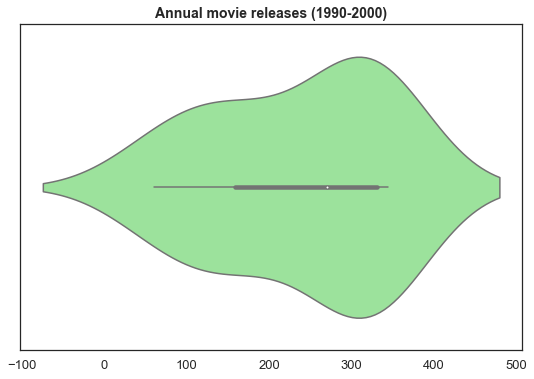

In [30]:
x=annual_movies[-10:]

plt.figure(figsize=(9,6))

sns.violinplot(x, color='lightgreen')

plt.xlabel('')
plt.title('Annual movie releases (1990-2000)', size=14, fontweight='bold')

As we can infer from the chart the minimum number of movies released across these 10 years is 60. The 1st Quartile is 158 (meaning that 25% of observations are less than 158 movies/year), the median is 280 (meaning that 50% of the observations are greater than 270 movies/year. This is the middle of the dataset), the 3rd Quartile is 331 (meaning that 75% of observations are less than 331 movies/year), and the maximum number of movies released is 345.

In [31]:
annual_movies[-10:]

1991     60
1992    102
1993    165
1994    257
1995    341
1996    345
1997    315
1998    337
1999    283
2000    156
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year'>

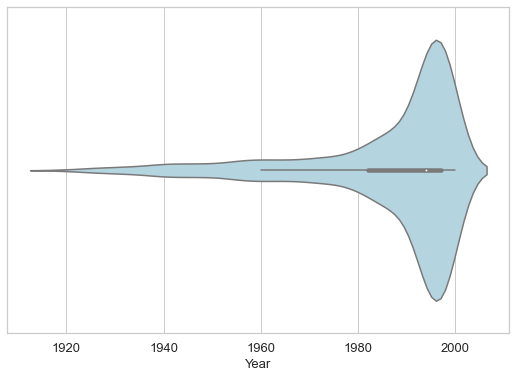

In [32]:
#we can also use the violin plot to evaluate the releases per year

plt.figure(figsize =(9, 6))
sns.set_style("whitegrid")
sns.violinplot(data=movies, x='Year', color="lightblue")

25% of the movies have been released until 1982. Half of the releases of the dataset have been released up to 1994 and 75% up to 1997. We can say that half of all movies released from 1919 have taken place from 1994 to 2000 (in only 6 years).

In [33]:
movies.Year.describe().round(1)

count    3882.0
mean     1986.1
std        16.9
min      1919.0
25%      1982.0
50%      1994.0
75%      1997.0
max      2000.0
Name: Year, dtype: float64

In [34]:
#As there are different genres by movie, I will split them up

dummy_movies = movies.Genre.str.get_dummies(sep='|')
dummy_movies.head(2)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [35]:
movies = movies.join(dummy_movies)
movies.head(2)

,ID,Movie Title,Genre,Year,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,2,Jumanji,Adventure|Children's|Fantasy,1995,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
#agrupem per any i agafem únicament els darrers 10 anys
data = movies.groupby("Year")[dummy_movies.columns].sum()
data=data[-11:]

data_transposed = data.transpose()  #transposem les dades ja que vull els anys a l'eix x
data_transposed

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
Action,19,6,21,25,32,45,37,43,44,27,19
Adventure,6,4,3,10,15,25,22,22,16,7,6
Animation,2,2,3,4,5,7,7,6,8,7,8
Children's,4,3,7,12,20,21,20,22,18,11,9
Comedy,22,24,37,47,96,88,115,98,112,103,69
Crime,7,1,10,8,9,18,23,26,25,12,8
Documentary,2,1,1,5,11,22,19,11,18,15,8
Drama,27,26,38,81,121,158,150,139,166,130,55
Fantasy,2,3,1,3,5,4,5,6,2,2,1
Film-Noir,1,0,0,1,0,1,2,2,3,0,0


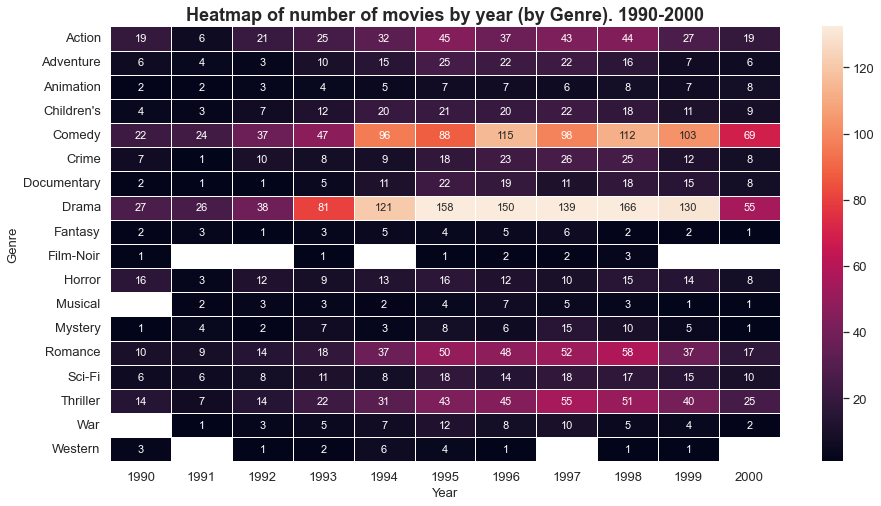

In [37]:
#dibuixem ara el mapa de calor. No mostrem les caselles amb valor 0
plt.figure(figsize =(15, 8))
mask = data_transposed == 0
sns.heatmap(data_transposed, annot=True, annot_kws={"size": 11}, robust=True, fmt='.0f', mask=mask, linewidths=1, linecolor="w")
plt.title('Heatmap of number of movies by year (by Genre). 1990-2000', size=18, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.show()

This heatmap shows us the highest values (number of movies released) by genre with warmer colors. We can see that from 1994 to 2000 Comedy and Drama are the genres with more movies released followed by Action, Romance, and Thriller. Western, Musical, and Film-Noir are the genres with fewer movies released.

In [38]:
#As there are movies with more than one Genre we will need to create a list of single Genres

movies.Genre=movies.Genre.str.split('|').tolist()

In [39]:
#We create a function to iterate through all the genres and count them

def one_genre(series):
 return pd.Series([x for _list in series for x in _list])

In [40]:
#calling the function

Genre_counts = one_genre(movies.Genre)

In [41]:
#sorting the data

by_genre=Genre_counts.value_counts().to_frame()
by_genre.sort_index
by_genre

,0
Drama,1603
Comedy,1199
Action,503
Thriller,492
Romance,471
Horror,343
Adventure,283
Sci-Fi,276
Children's,250
Crime,211


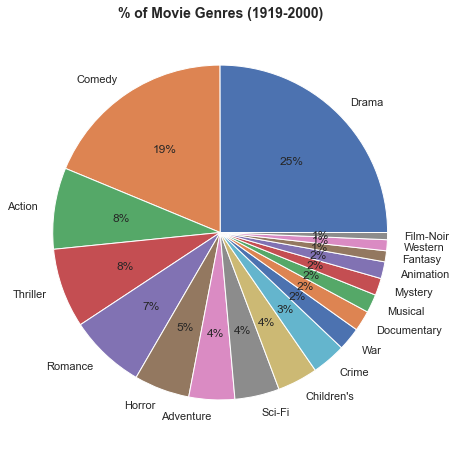

In [42]:
#Visualizing data, this time with a pie chart
sns.set(rc={'figure.figsize':(7.7,7.7)},style="whitegrid")

#define data
data = Genre_counts.value_counts()
labels = Genre_counts.value_counts().index

#create pie chart
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.title("% of Movie Genres (1919-2000)", size=14, fontweight='bold')
plt.show()

Drama (25% of total movies released), Comedy (19%), Action(8%), and Thriller (8%) are the genres that contain most of the movies from 1919 to 2000. Film-noir, Western, and Fantasy are minority genres.

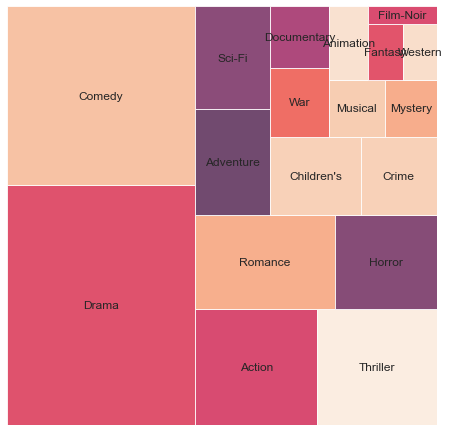

In [60]:
#We can also create a treemap with the weight of each genre

import squarify #algorithm for treemap

# plotting
squarify.plot(sizes=Genre_counts.value_counts(), label=by_genre.index, alpha=.8 )
plt.axis('off')
plt.show()

Absolutely right! Drama, Comedy, Action, Thriller, and Romance are the genres with most releases.

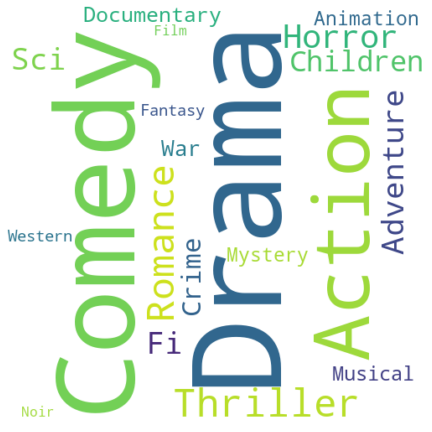

In [63]:
#Finally, I will create a word cloud for movie genres

from wordcloud import WordCloud

# Create a list of words
text = (' '.join(Genre_counts))

# Create the wordcloud object
wordcloud = WordCloud(collocations=False,background_color="white",width=500, height=500).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Yes! Drama, Comedy, Action, and Thriller are the genres with most of the releases.